In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import math
import cv2
import random 
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as dataset


In [ ]:
def randomizer(X,Y,extract):
  samples = X.shape[0]
  index = np.random.choice(samples,samples,replace=False) 
  X_rand = X[index]
  Y_rand = Y[index]
  X=X_rand[0:extract]
  Y=Y_rand[0:extract]
  return X,Y

def splitter(X,Y,splitting_ratio):
  num_data = int(X.shape[0]*(1-splitting_ratio))
  x_train = X[:num_data]
  x_test = X[num_data:]
  y_train = Y[:num_data]
  y_test = Y[num_data:]
  return x_train,x_test,y_train,y_test




In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']

names_of_features = iris['feature_names']
print("************Feature Names *********************************")
print(names_of_features)
names_of_classes = iris['target_names']
print("\n************Class Names *********************************")
print(names_of_classes)


y_possibilities=np.unique(y)

y_hot_coded=np.zeros((y.shape[0],y_possibilities.shape[0]))

for i in range(y_hot_coded.shape[0]):
  for j in range(y_hot_coded.shape[1]):
    if (y[i]==y_possibilities[j]):
      y_hot_coded[i,j]=1
      break

X_source=X
y_target=y_hot_coded[:,0]

Xp,Yp = randomizer(X_source,y_target,y_target.shape[0])
X_train,X_test,Y_train,Y_test=splitter(Xp,Yp,0.3)


************Feature Names *********************************
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

************Class Names *********************************
['setosa' 'versicolor' 'virginica']


Text(0.5, 1.0, 'Training Samples for Setosa Classification')

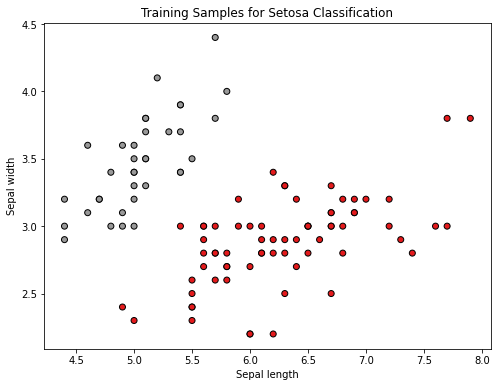

In [ ]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Training Samples for Setosa Classification')


Text(0.5, 1.0, 'Test Samples for Setosa Classification')

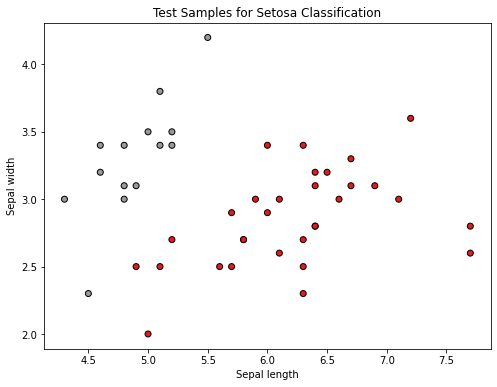

In [ ]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Test Samples for Setosa Classification')

In [ ]:

def perceptron(x,w,b):
  return np.dot(x,w.T) +b


def mse(y1,y2):
  diff = np.subtract(y1, y2)
  squa= np.square(diff)
  mser = squa.mean()/y2.shape[0]
  return mser

# Sigmoid Function
def sigmoid(x):
  return 1/(1 + np.exp(-x))

# Feedforward function
def feedforward(X,w,b):
  Y_pred = []
  for x in X:
    y_pred = sigmoid(perceptron(x,w,b))
    Y_pred.append(y_pred)
  return np.array(Y_pred)

#some functions on defining gradients under context of sigmoid
def grad_w_mse(x, y,w,b):
    y_pred = sigmoid(perceptron(x,w,b))
    return (y_pred - y) * y_pred * (1 - y_pred)*x


def grad_b_mse( x, y, w, b):
    y_pred = sigmoid(perceptron(x,w,b))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
 
#Backward Propagation
def backward(X, Y, w ,b, epochs=5, learning_rate=0.1):
  loss = []
  
  for i in range(epochs):
    dw = 0
    db = 0
    for x, y in zip(X, Y):
      dw += grad_w_mse(x, y,w,b)
      db += grad_b_mse(x, y,w, b) 
        
    m = X.shape[1]  
    w -= learning_rate * dw/m
    b -= learning_rate * db/m
    
    Y_pred = sigmoid(perceptron(X,w,b))
    loss.append(mse(Y, Y_pred))

  return w,b,loss


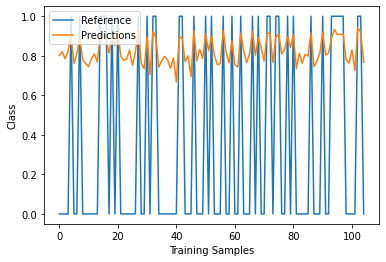

In [ ]:

limit   = 1 / (math.sqrt(X_train.shape[1])+0.01)
weight = np.random.uniform(-limit, limit,(1, X_train.shape[1]))
bias = 0

#a SLP feedforward action
Y_pred=feedforward(X_train,weight,bias)
sample=np.arange(Y_pred.shape[0])
plt.plot(sample,Y_train, label="Reference")
plt.plot(sample,Y_pred,label="Predictions")
plt.legend(loc="upper left")
plt.xlabel('Training Samples')
plt.ylabel('Class')
plt.show()




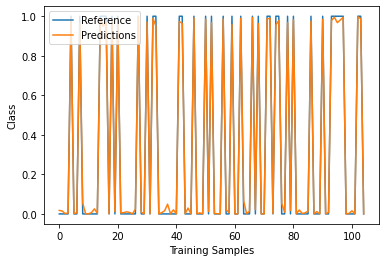

In [ ]:
#a SLP backward propagation action
new_weight,new_bias,loss=backward(X_train, Y_train, weight ,bias, epochs=500, learning_rate=0.09)


#a SLP feedforward action again after training
Y_pred=feedforward(X_train,new_weight,new_bias)
sample=np.arange(Y_pred.shape[0])
plt.plot(sample,Y_train, label="Reference")
plt.plot(sample,Y_pred,label="Predictions")
plt.legend(loc="upper left")
plt.xlabel('Training Samples')
plt.ylabel('Class')
plt.show()


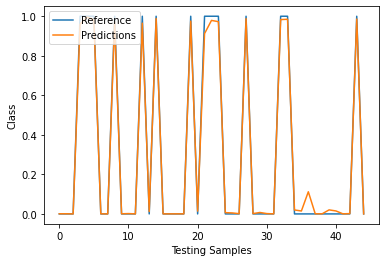

In [ ]:
#a SLP feedforward action again on testing
Y_pred_test=feedforward(X_test,new_weight,new_bias)
sample=np.arange(Y_pred_test.shape[0])
plt.plot(sample,Y_test, label="Reference")
plt.plot(sample,Y_pred_test,label="Predictions")
plt.legend(loc="upper left")
plt.xlabel('Testing Samples')
plt.ylabel('Class')
plt.show()

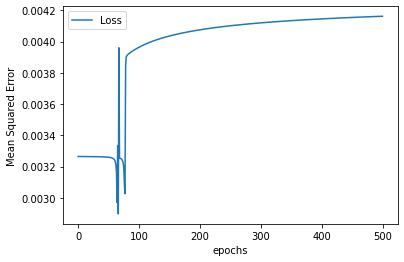

In [ ]:
sample=np.arange(np.array(loss).shape[0])
plt.plot(sample,np.array(loss), label="Loss")
plt.legend(loc="upper left")
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()